Pandas Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

step1: Splitting the data into groups based on some criteria.(straightforward)

step2: Applying a function to each group independently.(Apply means Aggregation, Transformation, Filtration)

step3: Combining the results into a data structure.

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


###### What is the average 'beer_servings' over all countries?

In [5]:
drinks.beer_servings.mean() # mean() method is used to find Average.

106.16062176165804

Lets see how to get 'beer_servings' by 'continent' : need to check 'beer_servings' on each continent (Asia, Europe, Africa etc). So this is case where we should use 'GROUPBY' operation as below:

In [7]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

How the above actually works? (as shown:)

Lets filter Dataframe by 'Europe' as below:

In [8]:
drinks[drinks.continent=='Europe']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
7,Armenia,21,179,11,3.8,Europe
9,Austria,279,75,191,9.7,Europe
10,Azerbaijan,21,46,5,1.3,Europe
15,Belarus,142,373,42,14.4,Europe
16,Belgium,295,84,212,10.5,Europe
21,Bosnia-Herzegovina,76,173,8,4.6,Europe
25,Bulgaria,231,252,94,10.3,Europe
42,Croatia,230,87,254,10.2,Europe


Above is the portion of Dataframe that is 'Europe' continent only.

In [9]:
drinks[drinks.continent=='Europe'].beer_servings.mean()

193.77777777777777

So, All the Groupby doing is - looking at its filtering the Dataframe by 'continent' in this(line 8) case.

line 9: addon to line 8 is mean() of 'beer_servings' on 'continent'. 

On line 9, we can repeat it based on different continents like Asia, Europe, Africa etc.

When should we use GROUPBY mostly?: Role of GroupBy is whenever we want to analyse some of the pandas Series by some of the classification/group. So in the above example group is 'continent' and want to analyse 'beer_servings' by group 'continent'.

In another words based on example we can say is : For each 'continent' what is mean() of 'beer_servings'.

In [10]:
drinks.groupby('continent').beer_servings.mean()
# For each 'continent', Average(mean()) of 'beer_servings'

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [11]:
drinks.groupby('continent').beer_servings.max()
# For each 'continent', maximum(max()) of 'beer_servings'

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [12]:
drinks.groupby('continent').beer_servings.min()
# For each 'continent', minimum(min()) of 'beer_servings'

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [13]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])
#Powerful function, .agg() which allows us to specify multiple aggregation function at once like count, min, max, mean
# For each 'continent', many aggregate function at once of 'beer_servings'

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


###### Useful hint: Actually no need to specify column like 'beer_servings': 

No need to specify any of the columns at all.

In [14]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


Above in this case, it calculates on mean() across all of the numeric columns.

And not to use this way, if you have too many numeric columns which is not best practice.

Here we can see mean() of beer_servings, spirit_servings, wine_servings and total_litres_of_pure_alcohol across continent. 

Display the above in visual form as below: 

In [16]:
%matplotlib inline 

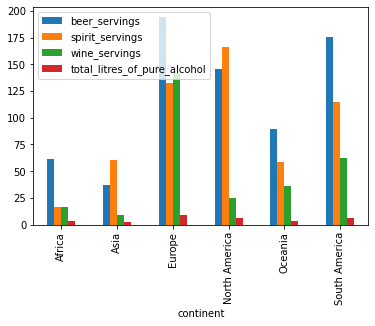

In [17]:
drinks.groupby('continent').mean().plot(kind='bar')